In [13]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import accuracy_score


### a


In [14]:
X , Y = make_moons(n_samples=200,noise=0.05,random_state=55)


In [15]:
Y = np.where(Y == 0, -1, 1)

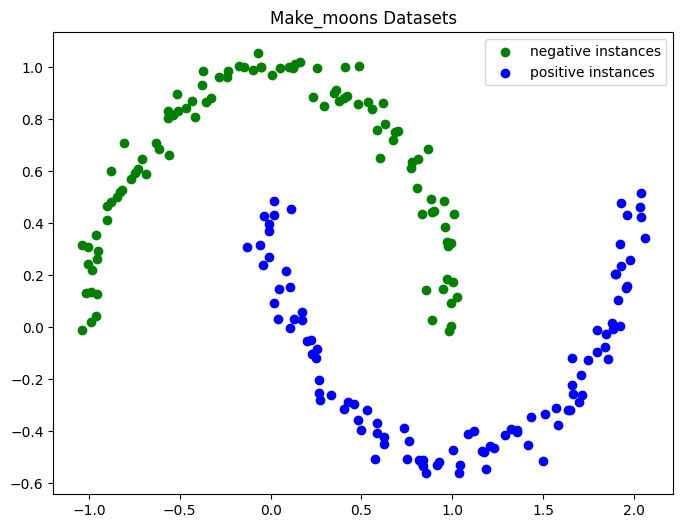

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X[Y==-1][:,0],X[Y==-1][:,1],color="green",label='negative instances')
plt.scatter(X[Y==1][:,0],X[Y==1][:,1],color="blue",label='positive instances')
plt.title("Make_moons Datasets")
plt.legend()
plt.show()

In [17]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=55)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(140, 2) (60, 2) (140,) (60,)


### b

In [18]:
# 定义从绿色到蓝色的颜色映射
colors = ["#00FF00", "#0000FF"]  
custom_cmap = LinearSegmentedColormap.from_list("green_to_blue", colors)

In [19]:
def plot_decision_boundary(ax, model, X, Y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.2, cmap=custom_cmap)
    ax.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], color="green", label="negative")
    ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color="blue", label="positive")
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, 
               facecolors='none', edgecolors='k', label="Support Vectors")
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

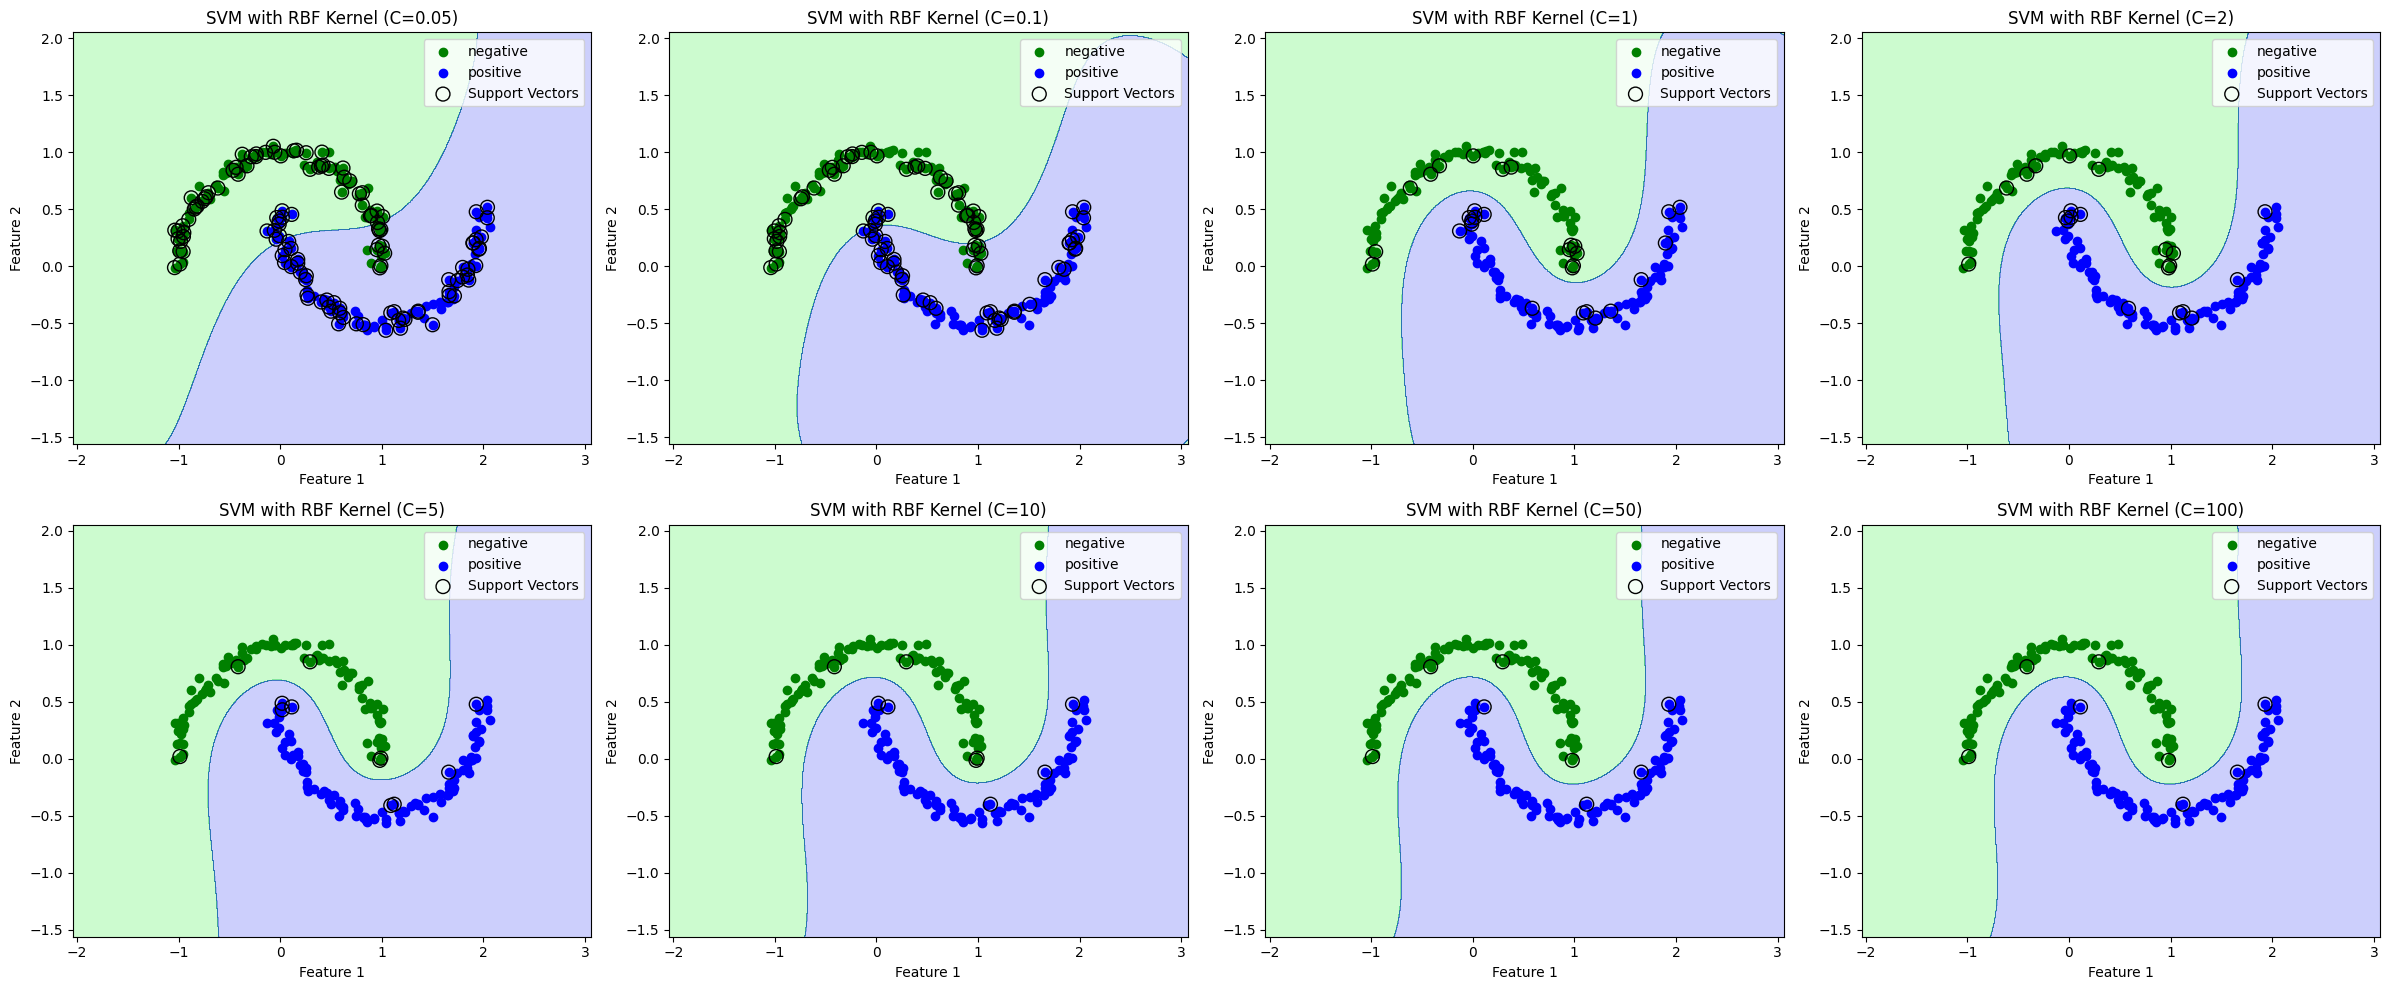

In [20]:
Parameter_C=[0.05,0.1,1,2,5,10,50,100]

fig,axes=plt.subplots(2,4,figsize=(24,10))
axes = axes.ravel()
for i, C in enumerate(Parameter_C):
    model = SVC(kernel="rbf", C=C, gamma="scale")
    model.fit(x_train, y_train)
    plot_decision_boundary(axes[i],model, X, Y, f"SVM with RBF Kernel (C={C})")
plt.tight_layout()
plt.show()

### c

Test Accuracies for Different Kernels:
linear: 0.95
poly: 0.95
rbf: 1.00
sigmoid: 0.63

Best Kernel: rbf with accuracy 1.00


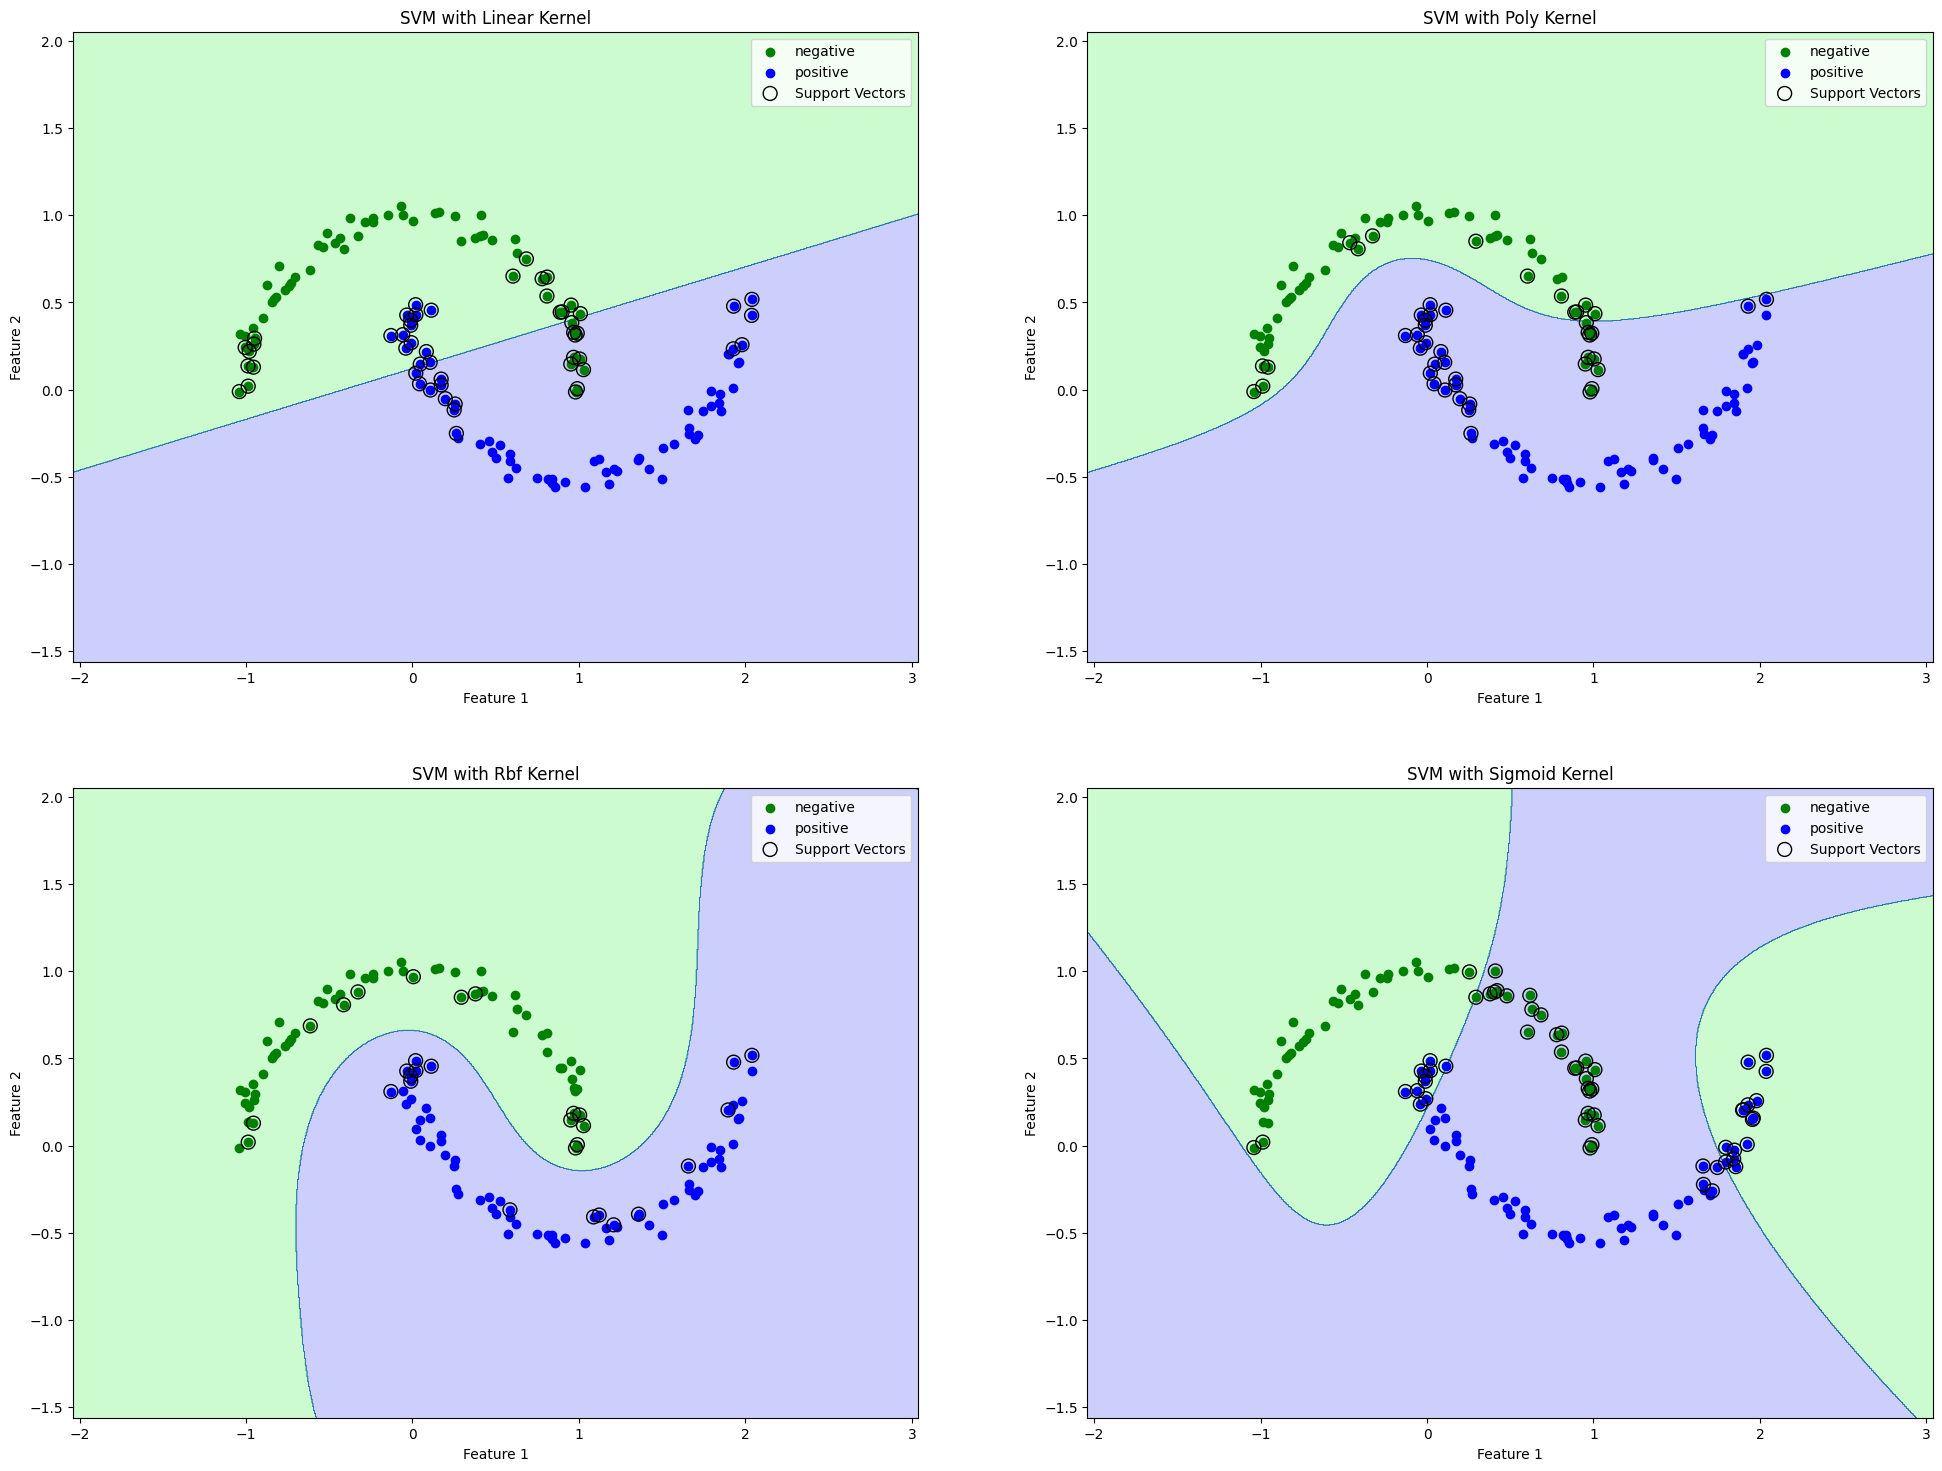

In [21]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
accuracies = {}
fig,axes=plt.subplots(2,2,figsize=(24,18))
axes = axes.ravel()
for i,kernel in enumerate(kernels):
    svm = SVC(kernel=kernel, C=1, gamma="scale")
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy
    plot_decision_boundary(axes[i],svm, x_train, y_train, f"SVM with {kernel.capitalize()} Kernel")

# 输出不同核函数的准确率
print("Test Accuracies for Different Kernels:")
for kernel, accuracy in accuracies.items():
    print(f"{kernel}: {accuracy:.2f}")

# 找出在测试集上表现最好的核函数
best_kernel = max(accuracies, key=accuracies.get)
print(f"\nBest Kernel: {best_kernel} with accuracy {accuracies[best_kernel]:.2f}")